In [3]:
!apt-get update
!apt-get install -y wget curl unzip


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Fetched 4,225 kB in 2s (2,705 kB/s)
Reading pack

In [4]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get install -f  # To fix missing dependencies

--2025-01-06 08:59:59--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 173.194.193.136, 173.194.193.190, 173.194.193.91, ...
Connecting to dl.google.com (dl.google.com)|173.194.193.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112770956 (108M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 107.55M   337MB/s    in 0.3s    

2025-01-06 08:59:59 (337 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [112770956/112770956]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (131.0.6778.204-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Pack

In [5]:
!google-chrome-stable --version

Google Chrome 131.0.6778.204 


In [6]:
import subprocess

# Run command to get Chrome version
chrome_version_output = subprocess.check_output(["google-chrome-stable", "--version"]).decode("utf-8")
# Extract version using regex
chrome_version = chrome_version_output.split()[2].split('.')[0]

print(f"Extracted Chrome Version: {chrome_version}")

Extracted Chrome Version: 131


In [7]:
!wget https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/linux64/chromedriver-linux64.zip




--2025-01-06 09:01:12--  https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 173.194.195.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945236 (9.5M) [application/zip]
Saving to: ‘chromedriver-linux64.zip’

chromedriver-linux6 100%[===================>]   9.48M  --.-KB/s    in 0.04s   

2025-01-06 09:01:12 (264 MB/s) - ‘chromedriver-linux64.zip’ saved [9945236/9945236]



In [8]:
!unzip chromedriver-linux64.zip

Archive:  chromedriver-linux64.zip
  inflating: chromedriver-linux64/LICENSE.chromedriver  
  inflating: chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: chromedriver-linux64/chromedriver  


In [9]:
!chmod +x /content/chromedriver-linux64/chromedriver

In [12]:
 !pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 27.2 MB/s eta 0:00:00


In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (without UI)
chrome_options.add_argument("--no-sandbox")  # Disable sandboxing (required in Colab)
chrome_options.add_argument("--disable-dev-shm-usage")  # Disable /dev/shm usage (avoids crash)
chrome_options.add_argument("--remote-debugging-port=9222")  # Avoid port conflicts

# Path to ChromeDriver (it is now in /usr/local/bin/)
chrome_driver_path = '/content/chromedriver-linux64/chromedriver'

# Set up the Service object for ChromeDriver
service = Service(chrome_driver_path)

# Initialize the WebDriver with the Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Test by navigating to a URL (Google in this case)
driver.get("https://youtu.be/Qye2HPaiB98?si=jPg3wLvQ3iclVHAi")

# Print the title of the page to check if it worked
print(driver.title)  # Should print 'Google'

# Close the driver after testing
driver.quit()

Full Video: Gango Renuka Thalli (Jathara) | Pushpa 2 The Rule | Allu Arjun | Rashmika | Sukumar |DSP - YouTube


In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up Chrome options for headless mode (no GUI)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (without UI)
chrome_options.add_argument("--no-sandbox")  # Disable sandboxing (required in Colab)
chrome_options.add_argument("--disable-dev-shm-usage")  # Disable /dev/shm usage (avoids crash)

# Path to ChromeDriver (adjust this based on your system)
chrome_driver_path = '/content/chromedriver-linux64/chromedriver'

# Set up the Service object for ChromeDriver
service = Service(chrome_driver_path)

# Initialize the WebDriver with the Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Ensure the file path is correct for the local HTML file (using file:// format)
file_path = 'file:///content/WEATHER.HTML'  # Update the file path accordingly
driver.get(file_path)

# Wait for the elements to be visible (adjust time as needed)
wait = WebDriverWait(driver, 10)  # Wait up to 10 seconds

try:
    # Find input elements (wait for their visibility)
    a_input = wait.until(EC.presence_of_element_located((By.ID, "a")))  # Adjust the ID as per your HTML
    b_input = wait.until(EC.presence_of_element_located((By.ID, "b")))
    c_input = wait.until(EC.presence_of_element_located((By.ID, "c")))
    t_input = wait.until(EC.presence_of_element_located((By.ID, "t")))

    calculate_button = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@type='button']")))

    # Send test data
    a_input.send_keys("1")
    b_input.send_keys("2")
    c_input.send_keys("3")
    t_input.send_keys("4")

    # Trigger calculation
    calculate_button.click()

    # Wait for the output to appear
    time.sleep(2)

    # Retrieve the result
    output = driver.find_element(By.ID, "output").text
    print(output)  # Should display: Temperature: 14.0°C

except Exception as e:
    print("Error:", e)

# Close the driver after testing
driver.quit()

Temperature: 14.0°C


Navigating to the HTML file...
Waiting for input elements to load...
Filling input fields with values...
Input values:
a1: 3
b1: 1
c1: 7
a2: 9
b2: -9
c2: 9
a3: -10
b3: 10
c3: -8
Clicking the plot button...
Scrolling to the chart...
Screenshot saved at: /content/graph_screenshot.png


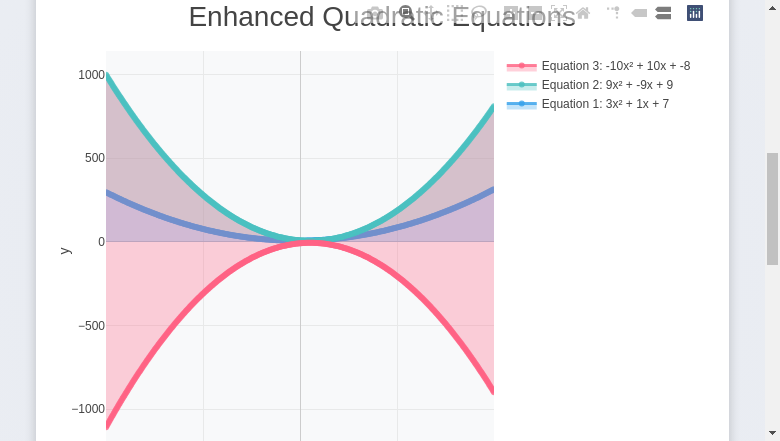

Test completed successfully.
Closing the driver...


In [15]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image, display  # Import to display images inline

# Set up Chrome options for headless mode (no GUI)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (without UI)
chrome_options.add_argument("--no-sandbox")  # Disable sandboxing (required in Colab)
chrome_options.add_argument("--disable-dev-shm-usage")  # Disable /dev/shm usage (avoids crash)

# Path to ChromeDriver (adjust this based on your system)
chrome_driver_path = '/content/chromedriver-linux64/chromedriver'  # Adjust as necessary

# Set up the Service object for ChromeDriver
service = Service(chrome_driver_path)

# Initialize the WebDriver with the Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Ensure the file path is correct for the local HTML file (using file:// format)
file_path = 'file:///content/final2.html'  # Update with the actual path

try:
    print("Navigating to the HTML file...")
    driver.get(file_path)

    # Wait for the elements to be visible (adjust time as needed)
    wait = WebDriverWait(driver, 20)  # Wait up to 20 seconds

    print("Waiting for input elements to load...")
    a1_input = wait.until(EC.presence_of_element_located((By.ID, "a1")))
    b1_input = wait.until(EC.presence_of_element_located((By.ID, "b1")))
    c1_input = wait.until(EC.presence_of_element_located((By.ID, "c1")))

    a2_input = wait.until(EC.presence_of_element_located((By.ID, "a2")))
    b2_input = wait.until(EC.presence_of_element_located((By.ID, "b2")))
    c2_input = wait.until(EC.presence_of_element_located((By.ID, "c2")))

    a3_input = wait.until(EC.presence_of_element_located((By.ID, "a3")))
    b3_input = wait.until(EC.presence_of_element_located((By.ID, "b3")))
    c3_input = wait.until(EC.presence_of_element_located((By.ID, "c3")))

    plot_button = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@onclick='plotGraph()']")))

    print("Filling input fields with values...")
    # Send test data (you can modify these values to your own)
    a1_input.clear()  # Clear the input before sending new values
    a1_input.send_keys("3")
    b1_input.clear()
    b1_input.send_keys("1")
    c1_input.clear()
    c1_input.send_keys("7")
    a2_input.clear()
    a2_input.send_keys("9")
    b2_input.clear()
    b2_input.send_keys("-9")
    c2_input.clear()
    c2_input.send_keys("9")
    a3_input.clear()
    a3_input.send_keys("-10")
    b3_input.clear()
    b3_input.send_keys("10")
    c3_input.clear()
    c3_input.send_keys("-8")

    # Double-check values are entered correctly
    print("Input values:")
    print("a1:", a1_input.get_attribute('value'))
    print("b1:", b1_input.get_attribute('value'))
    print("c1:", c1_input.get_attribute('value'))
    print("a2:", a2_input.get_attribute('value'))
    print("b2:", b2_input.get_attribute('value'))
    print("c2:", c2_input.get_attribute('value'))
    print("a3:", a3_input.get_attribute('value'))
    print("b3:", b3_input.get_attribute('value'))
    print("c3:", c3_input.get_attribute('value'))

    print("Clicking the plot button...")
    # Trigger the plot graph action
    plot_button.click()

    # Wait for the chart to render (adjust time as needed)
    time.sleep(3)

    # Scroll to the chart to ensure it is in the viewport
    print("Scrolling to the chart...")
    chart_element = driver.find_element(By.ID, "chart")
    driver.execute_script("arguments[0].scrollIntoView();", chart_element)

    # Wait a bit more to ensure the chart is visible
    time.sleep(2)

    # Take a screenshot of the entire page, including the chart
    screenshot_path = "/content/graph_screenshot.png"
    driver.save_screenshot(screenshot_path)
    print(f"Screenshot saved at: {screenshot_path}")

    # Display the screenshot inline
    display(Image(filename=screenshot_path))  # Show the image in the output

    print("Test completed successfully.")

except Exception as e:
    print("Error encountered:")
    import traceback
    traceback.print_exc()

finally:
    print("Closing the driver...")
    driver.quit()